In [1]:
import pandas as pd
import matplotlib.pyplot as plt


train=pd.read_csv('Train_data.csv')
test=pd.read_csv('Test_data.csv')


In [2]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [4]:
train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [5]:
total = train.shape[0]
missing_columns = [col for col in train.columns if train[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = train[col].isnull().sum()
    per = (null_count/total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")

In [6]:
print(f"Number of duplicate rows: {train.duplicated().sum()}")

Number of duplicate rows: 0


In [7]:
import seaborn as sns

<Axes: xlabel='class', ylabel='count'>

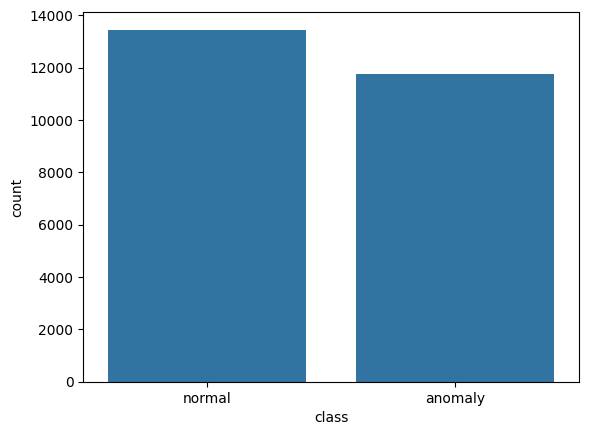

In [8]:
sns.countplot(x=train['class'])

In [9]:
print('Class distribution Training set:')
print(train['class'].value_counts())


Class distribution Training set:
class
normal     13449
anomaly    11743
Name: count, dtype: int64


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:

def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

le(train)
le(test)

In [12]:
train.drop(['num_outbound_cmds'], axis=1, inplace=True)
test.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [13]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [14]:
X_train = train.drop(['class'], axis=1)
Y_train = train['class']
     

In [15]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

In [16]:

import itertools
# Initialize the RandomForestClassifier
rfc = RandomForestClassifier()

# Create the RFE model with the random forest classifier and select 10 features
rfe = RFE(rfc, n_features_to_select=10)

# Fit the RFE model on the training data
rfe = rfe.fit(X_train, Y_train)

# Create a feature map to see which features were selected
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_train.columns)]

# Extract the names of the selected features
selected_features = [v for i, v in feature_map if i == True]

selected_features

['protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate']

In [32]:
# Remove 'service' from the selected features list if it exists
selected_features = [feature for feature in selected_features if feature != 'service']

# Display the updated selected features
print(selected_features)


['protocol_type', 'flag', 'src_bytes', 'dst_bytes', 'count', 'same_srv_rate', 'diff_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate']


In [33]:

# Subset the training data with the selected features
X_train_selected = X_train[selected_features]


Prepare Data for Semi-Supervised Learning:

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
# Assuming Y_train is the original label for X_train
# Split into labeled (e.g., 20%) and unlabeled (e.g., 80%) data
X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(
    X_train_selected, Y_train, test_size=0.8, stratify=Y_train, random_state=42
)

# Mark the unlabeled part with -1 to indicate they are unlabeled
y_unlabeled[:] = -1

# Combine labeled and unlabeled data for training
X_combined = pd.concat([X_labeled, X_unlabeled])
y_combined = pd.concat([y_labeled, y_unlabeled])

Train the Self-Training Model:

In [36]:
from sklearn.semi_supervised import SelfTrainingClassifier

In [37]:
# Initialize the RandomForestClassifier
base_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Create a self-training classifier using RandomForest as the base model
self_training_model = SelfTrainingClassifier(base_model, criterion='k_best', k_best=10)

# Train the model on the combined labeled and unlabeled data
self_training_model.fit(X_combined, y_combined)

SelfTrainingClassifier(base_estimator=RandomForestClassifier(random_state=42),
                       criterion='k_best')

 Evaluate the Model:

In [38]:
from sklearn.metrics import accuracy_score, classification_report
validation_data = pd.read_csv('Test_data.csv')


In [39]:
test_data = pd.read_csv('Test_data.csv')
test_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00
1,0,tcp,private,REJ,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71


here im valiating with a test dataset that i have

In [40]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report

# Load validation data from the test dataset
validation_data = pd.read_csv('Test_data.csv')

# Map protocol types if necessary
# Example mapping protocol names to numbers (adjust according to your dataset)
protocol_mapping = {'tcp': 6, 'udp': 17, 'icmp': 1}  # Modify as per your actual protocol labels
validation_data['protocol_type'] = validation_data['protocol_type'].map(protocol_mapping)

# Derive the packet size as the sum of src_bytes and dst_bytes
validation_data['packet_size'] = validation_data['src_bytes'] + validation_data['dst_bytes']

# Preprocess the validation data to ensure it has the same selected features as the training data
# The selected features include 'protocol_type', 'src_bytes', 'dst_bytes', 'count', etc.
selected_features = [
    'protocol_type', 'flag', 'src_bytes', 'dst_bytes', 'count', 
    'same_srv_rate', 'diff_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate'
]
X_val = validation_data[selected_features]

# Create a binary target column based on a condition using the 'flag' column or another condition
# Example: Assuming 'REJ' and 'S0' indicate anomalous or attack traffic
validation_data['target'] = validation_data['flag'].apply(lambda x: 1 if x in ['REJ', 'S0'] else 0)

# Set y_val as the 'target' column created above
y_val = validation_data['target']

# Use the self-training model to make predictions on the validation set
y_pred = self_training_model.predict(X_val)

# Evaluate the model using accuracy and classification report
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))


ValueError: could not convert string to float: 'REJ'